In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import joblib as joblib
import glob

from time import strptime
from datetime import datetime

In [2]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", "{:,.2f}".format)

## 1. Importing data

In [3]:
DATA_PATH = "../data/"

In [4]:
df = pd.read_csv(os.path.join(DATA_PATH, "bank-additional-full.csv"), sep=";")

In [5]:
df.shape

(41188, 22)

In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,year,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,2008,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
1,57,services,married,high.school,unknown,no,no,telephone,may,2008,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
2,37,services,married,high.school,no,yes,no,telephone,may,2008,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,2008,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
4,56,services,married,high.school,no,no,yes,telephone,may,2008,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,2010,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,2010,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,2010,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,2010,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,"4,963.60",yes


Let's build `anomes` variable

In [7]:
df["month_nb"] = df["month"].apply(lambda x : strptime(x,'%b').tm_mon)
df["anomes"] = (df["year"].astype(str) + df["month_nb"].astype(str).str.zfill(2)).astype(int)

In [8]:
df = df.drop(columns=["month_nb"])

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,year,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,anomes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,2008,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no,200805
1,57,services,married,high.school,unknown,no,no,telephone,may,2008,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no,200805
2,37,services,married,high.school,no,yes,no,telephone,may,2008,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no,200805
3,40,admin.,married,basic.6y,no,no,no,telephone,may,2008,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no,200805
4,56,services,married,high.school,no,no,yes,telephone,may,2008,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no,200805


Now, we see the target distribution

In [10]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
df_aux = df.groupby(["anomes"])["y"].value_counts().rename("counts").to_frame().reset_index()
df_aux = pd.pivot_table(df_aux, values="counts", index="anomes", columns="y")
df_aux["%yes"] = df_aux["yes"] / (df_aux["yes"] + df_aux["no"])
df_aux["total"] = df_aux["yes"] + df_aux["no"]
df_aux = df_aux.reset_index()
df_aux.sort_values(by="anomes")

y,anomes,no,yes,%yes,total
0,200805,7523,240,0.03,7763
1,200806,4186,188,0.04,4374
2,200807,6278,407,0.06,6685
3,200808,4904,271,0.05,5175
4,200810,25,42,0.63,67
5,200811,3426,190,0.05,3616
6,200812,9,1,0.10,10
7,200903,156,126,0.45,282
8,200904,2016,442,0.18,2458
9,200905,5270,524,0.09,5794


We see really asymetric distribution of registers across the months

## 2. Feature Engineering

We will create variables that are available in the prediction time, and also that would not bias the model towards personal information

Obs.: Let's create an index to identify each call / client.

In [12]:
df_feat = df.copy()

In [13]:
df_feat = df_feat.reset_index().rename(columns={"index":"id_call"}).set_index("id_call")
df_feat.head()

,age,job,marital,education,default,housing,loan,contact,month,year,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,anomes
id_call,,,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,2008,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no,200805
1,57,services,married,high.school,unknown,no,no,telephone,may,2008,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no,200805
2,37,services,married,high.school,no,yes,no,telephone,may,2008,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no,200805
3,40,admin.,married,basic.6y,no,no,no,telephone,may,2008,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no,200805
4,56,services,married,high.school,no,no,yes,telephone,may,2008,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no,200805


In [14]:
df_feat.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'year', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'anomes'],
      dtype='object')

### 2.1 Social and economic context attributes

We can use these attributes with no risk to bias the model (exception to the variable `nr.employed`).

In [15]:
df_feat = df_feat.drop(columns=["nr.employed"])

In [16]:
df_feat[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']].head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
id_call,,,,
0,1.10,93.99,-36.40,4.86
1,1.10,93.99,-36.40,4.86
2,1.10,93.99,-36.40,4.86
3,1.10,93.99,-36.40,4.86
4,1.10,93.99,-36.40,4.86


In [17]:
df_feat[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']].dtypes

emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
dtype: object

In [18]:
df_feat[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']].isna().sum()

emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
dtype: int64

As we can see, no need to transformn these variables.

### 2.2 Other attributes

Let's use the variables about past calls and campaigns

In [19]:
df_feat[["pdays", "previous", "poutcome", "campaign"]].head()

,pdays,previous,poutcome,campaign
id_call,,,,
0,999,0,nonexistent,1
1,999,0,nonexistent,1
2,999,0,nonexistent,1
3,999,0,nonexistent,1
4,999,0,nonexistent,1


In [20]:
df_feat[["pdays", "previous", "poutcome", "campaign"]].dtypes

pdays        int64
previous     int64
poutcome    object
campaign     int64
dtype: object

In [21]:
df_feat["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [22]:
def transform_poutcome(poutcome):
    poutcome_value = -1.0
    if poutcome == "success":
        poutcome_value = 1.0
    else: # "no" or "unknown"
        poutcome_value = 0.0
    return poutcome_value

df_feat["poutcome"] = df_feat["poutcome"].apply(transform_poutcome)

In [23]:
df_feat["poutcome"].value_counts()

0.00    39815
1.00     1373
Name: poutcome, dtype: int64

In [24]:
df_feat[["pdays", "previous", "poutcome", "campaign"]].describe()

,pdays,previous,poutcome,campaign
count,"41,188.00","41,188.00","41,188.00","41,188.00"
mean,962.48,0.17,0.03,2.57
std,186.91,0.49,0.18,2.77
min,0.00,0.00,0.00,1.00
25%,999.00,0.00,0.00,1.00
50%,999.00,0.00,0.00,2.00
75%,999.00,0.00,0.00,3.00
max,999.00,7.00,1.00,56.00


In [25]:
df_feat[["pdays", "previous", "poutcome", "campaign"]].isna().sum()

pdays       0
previous    0
poutcome    0
campaign    0
dtype: int64

### 2.3 Related with the last contact of the current campaign

The variables in this section are `contact`, `month`, `day_of_week`, `duration` (ane `year`, created manually).

We won't use `month`, becaus of the asymetry in the quantity of example per month. Neither `duration`, becaus we don't have it in prediction time.

Let's incorporate `contact` and `day_of_week` to the model.

In [26]:
df_feat = df_feat.drop(columns=["month", "year", "duration"])

In [27]:
df_feat["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [28]:
def transform_contact(contact):
    contact_value = -1.0
    if contact == "cellular":
        contact_value = 1.0
    else: # "no" or "unknown"
        contact_value = 0.0
    return contact_value

df_feat["contact"] = df_feat["contact"].apply(transform_contact)
df_feat = df_feat.rename(columns={"contact":"contacted_by_cellular"})

In [29]:
df_feat["contacted_by_cellular"].value_counts()

1.00    26144
0.00    15044
Name: contacted_by_cellular, dtype: int64

In [30]:
df_feat["contacted_by_cellular"].isna().sum()

0

In [31]:
df_feat["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [32]:
enc_dow = df_feat["day_of_week"].str.get_dummies()
enc_dow.columns = "day_of_week_" + enc_dow.columns
df_feat = pd.concat([df_feat, enc_dow], axis=1)
df_feat = df_feat.drop(columns=["day_of_week", "day_of_week_thu"])
df_feat.head()

,age,job,marital,education,default,housing,loan,contacted_by_cellular,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,anomes,day_of_week_fri,day_of_week_mon,day_of_week_tue,day_of_week_wed
id_call,,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,basic.4y,no,no,no,0.00,1,999,0,0.00,1.10,93.99,-36.40,4.86,no,200805,0,1,0,0
1,57,services,married,high.school,unknown,no,no,0.00,1,999,0,0.00,1.10,93.99,-36.40,4.86,no,200805,0,1,0,0
2,37,services,married,high.school,no,yes,no,0.00,1,999,0,0.00,1.10,93.99,-36.40,4.86,no,200805,0,1,0,0
3,40,admin.,married,basic.6y,no,no,no,0.00,1,999,0,0.00,1.10,93.99,-36.40,4.86,no,200805,0,1,0,0
4,56,services,married,high.school,no,no,yes,0.00,1,999,0,0.00,1.10,93.99,-36.40,4.86,no,200805,0,1,0,0


### 2.4 Bank client data

We will avoid using personal information like `age`, `job`, `marital`, `education` avoiding any bias in selecting the public. Using any of these variables would require business validation of the compliance rules of the enterprise, in order to avoid excluding public that should be proportionaly called.

Let's use `default`, `housing`, `loan`.

In [33]:
df_feat = df_feat.drop(columns=["age", "job", "marital", "education"])

In [34]:
def transform_yes_no_column(default):
    default_value = -1.0
    if default == "yes":
        default_value = 1.0
    else: # "no" or "unknown"
        default_value = 0.0
    return default_value

df_feat["default"] = df_feat["default"].apply(transform_yes_no_column)
df_feat["housing"] = df_feat["housing"].apply(transform_yes_no_column)
df_feat["loan"] = df_feat["loan"].apply(transform_yes_no_column)

In [35]:
df_feat

,default,housing,loan,contacted_by_cellular,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,anomes,day_of_week_fri,day_of_week_mon,day_of_week_tue,day_of_week_wed
id_call,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,1,999,0,0.00,1.10,93.99,-36.40,4.86,no,200805,0,1,0,0
1,0.00,0.00,0.00,0.00,1,999,0,0.00,1.10,93.99,-36.40,4.86,no,200805,0,1,0,0
2,0.00,1.00,0.00,0.00,1,999,0,0.00,1.10,93.99,-36.40,4.86,no,200805,0,1,0,0
3,0.00,0.00,0.00,0.00,1,999,0,0.00,1.10,93.99,-36.40,4.86,no,200805,0,1,0,0
4,0.00,0.00,1.00,0.00,1,999,0,0.00,1.10,93.99,-36.40,4.86,no,200805,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.00,1.00,0.00,1.00,1,999,0,0.00,-1.10,94.77,-50.80,1.03,yes,201011,1,0,0,0
41184,0.00,0.00,0.00,1.00,1,999,0,0.00,-1.10,94.77,-50.80,1.03,no,201011,1,0,0,0
41185,0.00,1.00,0.00,1.00,2,999,0,0.00,-1.10,94.77,-50.80,1.03,no,201011,1,0,0,0


### 2.5 Response variable

In [36]:
df_feat["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [37]:
df_feat["y"] = df_feat["y"].apply(transform_yes_no_column)

In [38]:
df_feat["y"].value_counts()

0.00    36548
1.00     4640
Name: y, dtype: int64

## 3. Data Prep

Are there nulls in the resulting database?

In [39]:
df_feat.isna().sum().sort_values(ascending=False).head(10)

default            0
housing            0
day_of_week_tue    0
day_of_week_mon    0
day_of_week_fri    0
anomes             0
y                  0
euribor3m          0
cons.conf.idx      0
cons.price.idx     0
dtype: int64

## 4. Train and test division

Let's do out-of-time division, to avoid using past and future examples in training.

In [40]:
df_aux = df_feat.groupby(["anomes"])["y"].value_counts().rename("counts").to_frame().reset_index()
df_aux = pd.pivot_table(df_aux, values="counts", index="anomes", columns="y")
df_aux["%1.0"] = df_aux[1] / (df_aux[1] + df_aux[0])
df_aux["total"] = df_aux[1] + df_aux[0]
df_aux = df_aux.reset_index()
df_aux.sort_values(by="anomes")

y,anomes,0.0,1.0,%1.0,total
0,200805,7523,240,0.03,7763
1,200806,4186,188,0.04,4374
2,200807,6278,407,0.06,6685
3,200808,4904,271,0.05,5175
4,200810,25,42,0.63,67
5,200811,3426,190,0.05,3616
6,200812,9,1,0.10,10
7,200903,156,126,0.45,282
8,200904,2016,442,0.18,2458
9,200905,5270,524,0.09,5794


In [41]:
df_train = df_feat[df_feat["anomes"] <= 200812]
df_test = df_feat[(df_feat["anomes"] >= 200812) & (df_feat["anomes"] <= 200912)]

In [42]:
df_train["y"].value_counts(), df_test["y"].value_counts()

(0.00    26351
 1.00     1339
 Name: y, dtype: int64,
 0.00    9221
 1.00    2229
 Name: y, dtype: int64)

In [43]:
df_train = df_train.drop(columns=["anomes"])
df_test = df_test.drop(columns=["anomes"])

Target proportion in train and test

In [44]:
len(df_train[df_train["y"] == 1.0]) / len(df_train), len(df_test[df_test["y"] == 1.0]) / len(df_test)

(0.04835680751173709, 0.19467248908296944)

Shape of train and test

In [45]:
X_train = df_train.drop(columns=["y"])
y_train = df_train["y"]
X_test = df_test.drop(columns=["y"])
y_test = df_test["y"]

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((27690, 16), (27690,), (11450, 16), (11450,))

## 4. Feature Selection

We will remove very correlated input features

Let's use the train dataset for that.

In [47]:
corr = X_train.corr()

<AxesSubplot:>

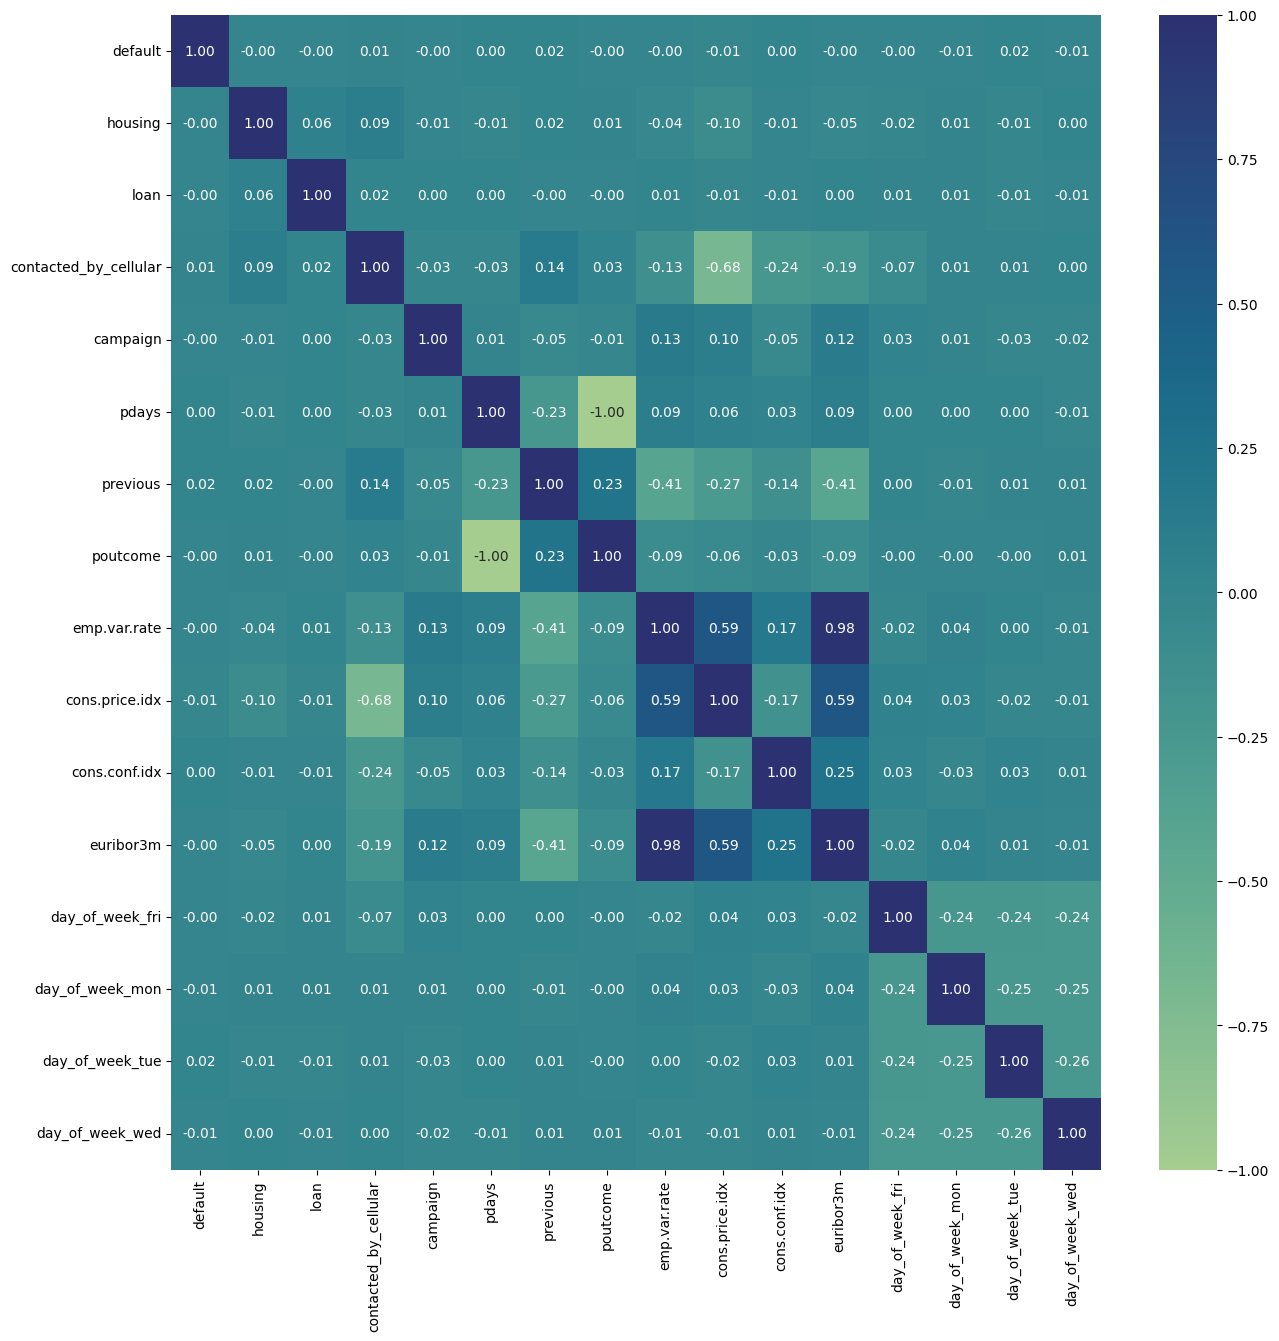

In [48]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, ax=ax, fmt='.2f', cmap="crest")

Let's remove some correlated features:

In [49]:
corr_features_to_remove = [
    "poutcome", # highly correlated with "pdays"
    "emp.var.rate" # highly correlated with "euribor3m"
]

In [50]:
df_train = df_train.drop(columns=corr_features_to_remove)
df_test = df_test.drop(columns=corr_features_to_remove)

In [51]:
df_train.shape, df_test.shape

((27690, 15), (11450, 15))

## 5. Modeling

In [126]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import shap

In [82]:
MODELS_PATH = "../models/"

In every model:
* Grid Search to find hyperparameters
* Cross-validation with 5 folds, evaluating mean ROC-AUC among the folds

### 5.1 Random Forest

In [83]:
model_rf = RandomForestClassifier(criterion='gini', n_jobs=-1, random_state=42, class_weight="balanced")
pipe_rf = Pipeline([('rf', model_rf)])
params_rf = {
    "rf__n_estimators": [100, 250, 500],
    "rf__max_depth": [5, 10, 15, 20],
    "rf__min_samples_split": [3, 5, 7],
    "rf__min_samples_leaf": [3, 5, 7],
}
search_rf = GridSearchCV(pipe_rf, params_rf, scoring='roc_auc', cv=5, n_jobs=-1, verbose=4, return_train_score=True)

In [84]:
%%time
RF_PATH = os.path.join(MODELS_PATH, "rf.joblib")
if glob.glob(RF_PATH):
    search_rf = joblib.load(RF_PATH)
else: 
    search_rf.fit(X_train, y_train)
    best_model_rf = search_rf.best_estimator_
    joblib.dump(search_rf, RF_PATH)
    print(search_rf.best_params_)
    print(search_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'rf__max_depth': 5, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 7, 'rf__n_estimators': 250}
0.4176084591811172
CPU times: user 2.29 s, sys: 597 ms, total: 2.88 s
Wall time: 3min 11s


In [85]:
best_model_rf

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=3, min_samples_split=7,
                                        n_estimators=250, n_jobs=-1,
                                        random_state=42))])

In [86]:
search_rf.best_score_

0.4176084591811172

### 5.2 SVM Radial

In [87]:
model_svc = SVC(kernel="rbf", probability=True, class_weight='balanced', random_state=42)
pipe_svc = Pipeline([('scaler', MinMaxScaler()), ('svc', model_svc)])
params_svc = {
    "svc__C": [0.01, 0.1, 1, 5, 10, 25],
}
search_svc = GridSearchCV(pipe_svc, params_svc, scoring='roc_auc', cv=5, n_jobs=-1, verbose=4, return_train_score=True)

In [88]:
%%time
SVC_PATH = os.path.join(MODELS_PATH, "svc.joblib")
if glob.glob(SVC_PATH):
    search_svc = joblib.load(SVC_PATH)
else: 
    search_svc.fit(X_train, y_train)
    best_model_svc = search_svc.best_estimator_
    joblib.dump(search_svc, SVC_PATH)
    print(search_svc.best_params_)
    print(search_svc.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=250;, score=(train=0.694, test=0.338) total time=   1.3s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=500;, score=(train=0.688, test=0.357) total time=   2.9s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=500;, score=(train=0.651, test=0.368) total time=   2.9s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=500;, score=(train=0.651, test=0.368) total time=   3.0s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=3, rf__n_estimators=500;, score=(train=0.682, test=0.599) total time=   2.8s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=5, rf__n_estimators=250;, score=(train=0.650, test=0.367) total time=   1.3s
[CV 1/5] END rf__max_d

[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=100;, score=(train=0.689, test=0.418) total time=   0.4s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=500;, score=(train=0.688, test=0.413) total time=   2.8s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=250;, score=(train=0.689, test=0.355) total time=   1.4s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=100;, score=(train=0.693, test=0.332) total time=   0.8s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=100;, score=(train=0.651, test=0.358) total time=   0.7s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=250;, score=(train=0.688, test=0.426) total time=   1.6s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=3, rf_

[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=100;, score=(train=0.650, test=0.358) total time=   0.5s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=500;, score=(train=0.696, test=0.333) total time=   2.9s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=500;, score=(train=0.682, test=0.600) total time=   3.1s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=250;, score=(train=0.689, test=0.355) total time=   1.5s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=3, rf__n_estimators=100;, score=(train=0.694, test=0.324) total time=   0.7s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=3, rf__n_estimators=100;, score=(train=0.649, test=0.359) total time=   0.7s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=3, rf_

[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=250;, score=(train=0.681, test=0.591) total time=   1.5s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=500;, score=(train=0.651, test=0.368) total time=   2.7s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=500;, score=(train=0.688, test=0.413) total time=   3.2s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=250;, score=(train=0.651, test=0.366) total time=   1.2s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=3, rf__n_estimators=100;, score=(train=0.685, test=0.426) total time=   0.7s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=3, rf__n_estimators=250;, score=(train=0.681, test=0.598) total time=   1.4s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=3, rf_

{'svc__C': 0.01}
0.4566535374336043
CPU times: user 1min 24s, sys: 621 ms, total: 1min 24s
Wall time: 13min 33s


In [89]:
best_model_svc

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc',
                 SVC(C=0.01, class_weight='balanced', probability=True,
                     random_state=42))])

In [90]:
search_svc.best_score_

0.4566535374336043

### 5.3 XGBoost

In [91]:
model_xgb = xgb.XGBClassifier(criterion='gini', n_jobs=-1, random_state=42, class_weight="balanced")
pipe_xgb = Pipeline([('xgb', model_xgb)])
params_xgb = {
    "xgb__n_estimators": [5, 10, 15],
    "xgb__max_depth": [3, 4, 5],
    "xgb__min_child_weight": [1, 5, 10],
    #"xgb__gamma": [0.5, 1, 5],
    #"xgb__subsample": [0.6, 0.8, 1.0],
    "xgb__colsample_bytree": [0.6, 0.8, 1.0],
}
search_xgb = GridSearchCV(pipe_xgb, params_xgb, scoring='roc_auc', cv=3, n_jobs=-1, verbose=4, return_train_score=True)

In [92]:
%%time
XGB_PATH = os.path.join(MODELS_PATH, "xgb.joblib")
if glob.glob(XGB_PATH):
    search_xgb = joblib.load(XGB_PATH)
else: 
    search_xgb.fit(X_train.astype(float), y_train)
    best_model_xgb = search_xgb.best_estimator_
    joblib.dump(search_xgb, XGB_PATH)
    print(search_xgb.best_params_)
    print(search_xgb.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[13:48:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight", "criterion" } are not used.

{'xgb__colsample_bytree': 1.0, 'xgb__max_depth': 5, 'xgb__min_child_weight': 5, 'xgb__n_estimators': 15}
0.37863793354693304
CPU times: user 913 ms, sys: 318 ms, total: 1.23 s
Wall time: 5.6 s


In [93]:
best_model_xgb

Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               class_weight='balanced', colsample_bylevel=1,
                               colsample_bynode=1, colsample_bytree=1.0,
                               criterion='gini', early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=5, max_leaves=0,
                               min_child_weight=5, missing=nan,
                               monotone_constraints='()', n_estimators=15,
                               n_jobs=-1, num_parallel_tree=1, ...))])

In [94]:
search_xgb.best_score_

0.37863793354693304

### 5.4 KNN

In [98]:
model_knn = KNeighborsClassifier(weights="uniform")
pipe_knn = Pipeline([('scaler', MinMaxScaler()), ('knn', model_knn)])
params_knn = {
    "knn__n_neighbors": [5, 10, 15, 20, 25, 30, 50, 100, 150]
}
search_knn = GridSearchCV(pipe_knn, params_knn, scoring='roc_auc', cv=5, n_jobs=-1, verbose=4, return_train_score=True)

In [99]:
%%time
KNN_PATH = os.path.join(MODELS_PATH, "knn.joblib")
if glob.glob(KNN_PATH):
    search_knn = joblib.load(KNN_PATH)
else: 
    search_knn.fit(X_train, y_train)
    best_model_knn = search_knn.best_estimator_
    joblib.dump(search_knn, KNN_PATH)
    print(search_knn.best_params_)
    print(search_knn.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'knn__n_neighbors': 150}
0.4212034811408728
CPU times: user 111 ms, sys: 107 ms, total: 218 ms
Wall time: 15.3 s


In [100]:
best_model_knn

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=150))])

In [101]:
search_knn.best_score_

0.4212034811408728

### 5.5 MultiLayer Perceptron

In [102]:
model_mlp = MLPClassifier(hidden_layer_sizes=(len(X_train.columns), 50, 50), activation='relu', solver='adam', epsilon=1e-8, beta_2=0.999, max_iter=2000, random_state=42)
pipe_mlp = Pipeline([('scaler', MinMaxScaler()), ('mlp', model_mlp)])
params_mlp = {
    "mlp__alpha": [0.0001, 0.001, 0.01, 0.1],
    "mlp__beta_1": [0.9, 0.99, 0.999],
}
search_mlp = GridSearchCV(pipe_mlp, params_mlp, scoring='roc_auc', cv=5, n_jobs=-1, verbose=4, return_train_score=True)

In [103]:
%%time
MLP_PATH = os.path.join(MODELS_PATH, "mlp.joblib")
if glob.glob(MLP_PATH):
    search_mlp = joblib.load(MLP_PATH)
else: 
    search_mlp.fit(X_train, y_train)
    best_model_mlp = search_mlp.best_estimator_
    joblib.dump(search_mlp, MLP_PATH)
    print(search_mlp.best_params_)
    print(search_mlp.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'mlp__alpha': 0.0001, 'mlp__beta_1': 0.999}
0.46188279948755273
CPU times: user 1min 17s, sys: 846 ms, total: 1min 18s
Wall time: 59.8 s


In [104]:
best_model_mlp

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('mlp',
                 MLPClassifier(beta_1=0.999, hidden_layer_sizes=(16, 50, 50),
                               max_iter=2000, random_state=42))])

In [106]:
search_mlp.best_score_

0.46188279948755273

## 6. Models evaluation

Let's evaluate the ROC-AUC in the test dataset to determine the best model.

In [107]:
X_test = X_test.astype(float)

In [108]:
def plot_roc_auc_curve(X_test, y_test, model, model_name):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = round(roc_auc_score(y_test, y_proba), 4)
    plt.plot(fpr, tpr, label="{}, AUC=".format(model_name)+str(auc))

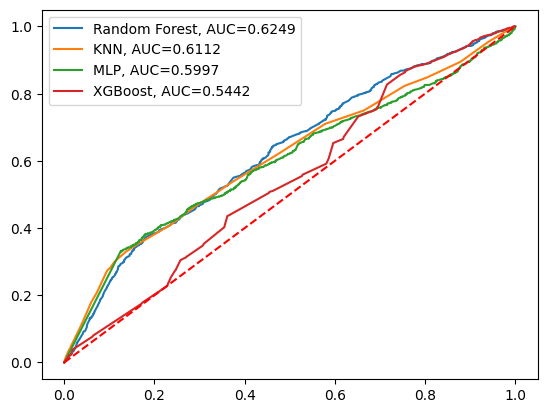

In [124]:
plt.figure(0).clf()
plot_roc_auc_curve(X_test, y_test, best_model_rf, "Random Forest")
plot_roc_auc_curve(X_test, y_test, best_model_knn, "KNN")
plot_roc_auc_curve(X_test, y_test, best_model_mlp, "MLP")
plot_roc_auc_curve(X_test, y_test, best_model_xgb, "XGBoost")
#plot_roc_auc_curve(X_test, y_test, best_model_svc, "SVM Radial")
plt.plot([0, 1], [0, 1],'r--')
plt.legend()

So, we choose the best model: Random Forest

## 7. Most important variables

In [122]:
best_model_rf["rf"].estimators_

[DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=7, random_state=1608637542),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=7, random_state=1273642419),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=7, random_state=1935803228),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=7, random_state=787846414),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=7, random_state=996406378),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=7, random_state=1201263687),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                        min_sa

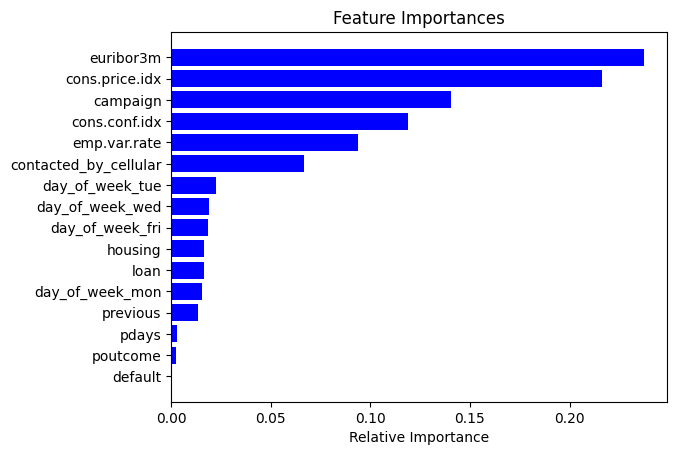

In [123]:
features = X_train.columns
importances = best_model_rf["rf"].feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

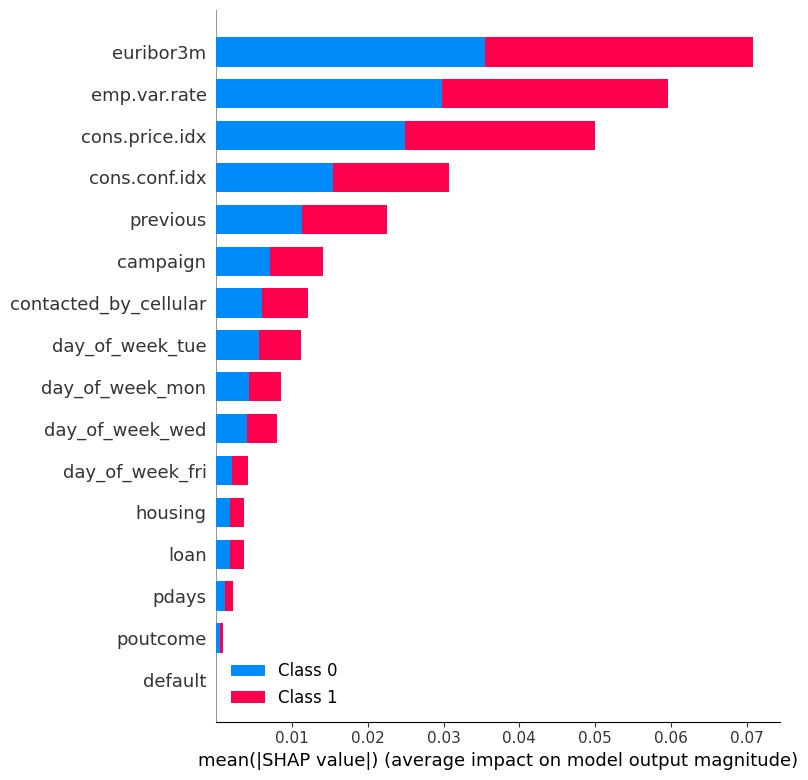

In [127]:
explainer = shap.TreeExplainer(best_model_rf["rf"])
shap_values = explainer.shap_values(X_test)
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values, X_test)
plt.show()

## 8. Most probable subscriber public

Let's relate the original data to the score obtained with the best model

In [134]:
df_public = df[df.index.isin(df_test.index)].copy()

In [143]:
df_public.index == df_test.index

array([ True,  True,  True, ...,  True,  True,  True])

In [139]:
df_public.head()

,age,job,marital,education,default,housing,loan,contact,month,year,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,anomes
27680,31,admin.,single,high.school,no,yes,no,telephone,dec,2008,mon,36,1,999,0,nonexistent,-0.20,92.76,-45.90,3.82,"5,176.30",no,200812
27681,39,housemaid,married,basic.4y,no,yes,no,telephone,dec,2008,wed,11,1,999,1,failure,-0.20,92.76,-45.90,3.74,"5,176.30",no,200812
27682,41,technician,divorced,professional.course,no,no,yes,cellular,dec,2008,thu,18,1,999,0,nonexistent,-0.20,92.76,-45.90,3.67,"5,176.30",no,200812
27683,37,admin.,married,high.school,no,yes,no,telephone,dec,2008,fri,12,1,999,0,nonexistent,-0.20,92.76,-45.90,3.56,"5,176.30",no,200812
27684,48,admin.,married,high.school,no,yes,yes,telephone,dec,2008,fri,291,1,999,0,nonexistent,-0.20,92.76,-45.90,3.56,"5,176.30",no,200812


We add the scores given by the Random Forest model

In [140]:
y_proba = best_model_rf.predict_proba(X_test)[:, 1]

In [147]:
df_public["Score"] = y_proba

In [149]:
df_public["Score"].isna().value_counts()

False    11450
Name: Score, dtype: int64

In [150]:
df_public.head()

,age,job,marital,education,default,housing,loan,contact,month,year,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,anomes,Score
27680,31,admin.,single,high.school,no,yes,no,telephone,dec,2008,mon,36,1,999,0,nonexistent,-0.20,92.76,-45.90,3.82,"5,176.30",no,200812,0.53
27681,39,housemaid,married,basic.4y,no,yes,no,telephone,dec,2008,wed,11,1,999,1,failure,-0.20,92.76,-45.90,3.74,"5,176.30",no,200812,0.47
27682,41,technician,divorced,professional.course,no,no,yes,cellular,dec,2008,thu,18,1,999,0,nonexistent,-0.20,92.76,-45.90,3.67,"5,176.30",no,200812,0.55
27683,37,admin.,married,high.school,no,yes,no,telephone,dec,2008,fri,12,1,999,0,nonexistent,-0.20,92.76,-45.90,3.56,"5,176.30",no,200812,0.54
27684,48,admin.,married,high.school,no,yes,yes,telephone,dec,2008,fri,291,1,999,0,nonexistent,-0.20,92.76,-45.90,3.56,"5,176.30",no,200812,0.54


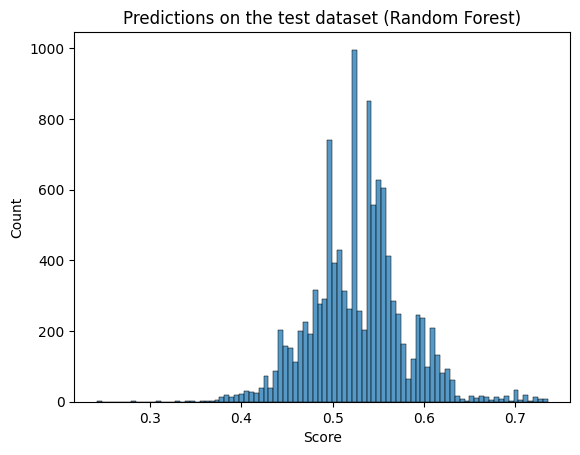

In [157]:
sns.histplot(data=df_public, x="Score").set_title("Predictions on the test dataset (Random Forest)");

Let's see what we get for the input variables

In [162]:
df_public["score_classification"] = np.ceil(df_public["Score"] * 10)
#pd.qcut(df_public["Score"], q=10, labels=range(10))

In [165]:
df_public.head()

,age,job,marital,education,default,housing,loan,contact,month,year,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,anomes,Score,score_classification
27680,31,admin.,single,high.school,no,yes,no,telephone,dec,2008,mon,36,1,999,0,nonexistent,-0.20,92.76,-45.90,3.82,"5,176.30",no,200812,0.53,6.00
27681,39,housemaid,married,basic.4y,no,yes,no,telephone,dec,2008,wed,11,1,999,1,failure,-0.20,92.76,-45.90,3.74,"5,176.30",no,200812,0.47,5.00
27682,41,technician,divorced,professional.course,no,no,yes,cellular,dec,2008,thu,18,1,999,0,nonexistent,-0.20,92.76,-45.90,3.67,"5,176.30",no,200812,0.55,6.00
27683,37,admin.,married,high.school,no,yes,no,telephone,dec,2008,fri,12,1,999,0,nonexistent,-0.20,92.76,-45.90,3.56,"5,176.30",no,200812,0.54,6.00
27684,48,admin.,married,high.school,no,yes,yes,telephone,dec,2008,fri,291,1,999,0,nonexistent,-0.20,92.76,-45.90,3.56,"5,176.30",no,200812,0.54,6.00


In [186]:
statistics = df_public.groupby("score_classification").agg({
    'age': "mean", 
    'job': lambda x : pd.Series.mode(x)[0],
    'marital': lambda x : pd.Series.mode(x)[0],
    'education': lambda x : pd.Series.mode(x)[0],
    'default': lambda x : pd.Series.mode(x)[0],
    'housing': lambda x : pd.Series.mode(x)[0],
    'loan': lambda x : pd.Series.mode(x)[0],
    'contact': lambda x : pd.Series.mode(x)[0],
    'duration': lambda x : pd.Series.mode(x)[0],
    'campaign': "mean",
    'pdays': lambda x : x[x != 999].mean(),
    'previous': "mean",
    #'poutcome': lambda x : pd.Series.mode(x)[0],
    'emp.var.rate': "mean",
    'cons.price.idx': "mean",
    'cons.conf.idx': "mean",
    'euribor3m': "mean",
    #'nr.employed': "mean"
})
size_bins = df_public.groupby("score_classification").size().rename("Qtt. of calls")
statistics = pd.concat([size_bins, statistics], axis=1)
statistics

,Qtt. of calls,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
score_classification,,,,,,,,,,,,,,,,,
3.00,2,58.50,admin.,divorced,university.degree,no,yes,no,cellular,70,20.50,NaN,0.00,-1.80,92.84,-50.00,1.66
4.00,91,38.33,blue-collar,married,high.school,no,yes,no,cellular,7,6.80,2.64,0.95,-1.85,92.90,-45.90,1.30
5.00,3263,38.31,blue-collar,married,high.school,no,yes,no,cellular,11,3.01,4.82,0.65,-1.86,92.92,-45.89,1.57
6.00,7180,39.22,admin.,married,university.degree,no,yes,no,cellular,104,1.71,5.57,0.25,-2.13,92.85,-43.13,133.07
7.00,844,42.93,admin.,married,university.degree,no,no,no,cellular,207,1.76,6.47,0.15,-3.08,92.54,-33.11,583.84
8.00,70,45.16,admin.,married,university.degree,no,yes,no,telephone,120,1.30,13.00,0.01,-3.17,92.40,-30.00,788.50


For the scores 3.0, 4.0 and 8.0, we have a small public, so we need to be careful about the conclusions we derive from them.

For the score 7.0 (the highest), we get this public:
- about ~42 years old in average
- majority of administrators and married people, with university degree
- majority having no defaults, no housings and no loans
- majority was contacted via cellular, with more than 3 minutes of call
- roughly 2 contacts performed during the campaign (campaign) (smaller than the other categories), roughly 6 days passed after the last campaign (pdays) (greater than the other categories), almost no previous contact performed before this campaign (previous). That shows a characteristic that the clients tend to be more receptive to subscribe after waiting for some time to be recalled, and tend to subscribe more when the calls are longer.
- lower CPI (inflation) mean rate, higher CCI (confidence rate) and higher Euribor rate.